<font size="4">

Investigando sobre el dataset en la web de la [Universidad de California](https://archive.ics.uci.edu/dataset/222/bank+marketing), tenemos la siguiente información sobre las columnas del dataset:

A continuación se muestran de manera detallada cada una de las variables de entrada (la variable de salida se ha eliminado para este caso, ya que no nos interesa)

Los datos de este dataset están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para determinar si el producto (depósito a plazo bancario) sería suscrito ("sí") o no ("no").

### **Variables de entrada:**  
#### **Datos del cliente:**  
1. **age** (numeric) – Edad del cliente.  
2. **job** (categorical) – Tipo de empleo (*"admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services"*).  
3. **marital** (categorical) – Estado civil (*"married", "divorced", "single"*; *"divorced"* incluye divorciados y viudos).  
4. **education** (categorical) – Nivel educativo (*"unknown", "secondary", "primary", "tertiary"*).  
5. **default** (binary) – ¿Tiene crédito en impago? (*"yes", "no"*).  
6. **balance** (numeric) – Saldo medio anual en euros.  
7. **housing** (binary) – ¿Tiene préstamo hipotecario? (*"yes", "no"*).  
8. **loan** (binary) – ¿Tiene préstamo personal? (*"yes", "no"*).  

#### **Datos del último contacto en la campaña actual:**  
9. **contact** (categorical) – Tipo de comunicación (*"unknown", "telephone", "cellular"*).  
10. **day** (numeric) – Día del mes en que se realizó el último contacto.  
11. **month** (categorical) – Mes del último contacto (*"jan", "feb", "mar", ..., "nov", "dec"*).  
12. **duration** (numeric) – Duración del último contacto en segundos.  

#### **Otras variables:**  
13. **campaign** (numeric) – Número de contactos realizados en la campaña actual con este cliente (incluye el último contacto).  
14. **pdays** (numeric) – Días transcurridos desde el último contacto en una campaña anterior (*-1 significa que el cliente no fue contactado antes*).  
15. **previous** (numeric) – Número de contactos previos con este cliente en campañas anteriores.  
16. **poutcome** (categorical) – Resultado de la campaña de marketing anterior (*"unknown", "other", "failure", "success"*). 




### Información General sobre el Dataset

El dataset que vamos a analizar consta de 17 columnas, de las cuales 16 corresponden a las variables independientes, mientras que la última corresponde a la variable resultado. Al tratarse de la creación de un modelo No Supervisado, vamos a eliminar dicha columna resultado para simular una situación real y hacer un análisis y un modelo con datos no etiquetados.
</font>

In [636]:
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# cargamos el dataset
dataset = pd.read_csv("dataset/bank-full.csv", sep=";")
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [637]:
# eliminamos columna resultado
print(f"número de columnas antes de la eliminacion {len(dataset.columns)}")
dataset = dataset.drop(columns="y")
print(f"número de columnas después de la eliminacion {len(dataset.columns)}")

número de columnas antes de la eliminacion 17
número de columnas después de la eliminacion 16


<font size="4">

El dataset que vamos a analizar consta de 16 características, las cuales podemos observar que hay variables de tipo categóricas como variables de tipo numéricas. En total tenemos 45211 registros.

In [638]:
# vemos la dimensión del dataset
print(f"Numero de columnas del dataset {dataset.shape[1]}")
print(f"Numero de registros del dataset {dataset.shape[0]}")

Numero de columnas del dataset 16
Numero de registros del dataset 45211


In [639]:
# información sobre el dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [640]:
# hacemos un conteo de los registros
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<font size="4">

# 1. Preprocesamiento de los datos

A continuación, vamos a realizar un preprocesado de los datos, con la finalidad de limpiar lo máximo posible nuestro dataset. Para ello, tendremos en cuenta los siguientes pasos:

1. Tratamiento de los datos nulos en las celdas.
2. Tratamiento de las columnas irrelevantes.
3. Tratamiento de las filas repetidas.
4. Tratamiento de los valores extremos o outliers en las variables numéricas.
5. Tratamiento de las variables categóricas, en donde, buscaremos posibles errores topográficos...


### 1.1 Tratamiento de los valores nulos en las celdas

Aquí veremos los registros a los que les falte algún dato o contengan datos nulos. Aunque la función info() nos da la cantidad de registros por cada una de las columnas y, estas coinciden con el número total de registros, no se aprecia la existencia de valores nulos. De todas maneras, vamos a utilizar la función dropna() que lo que hace es eliminar cualquier valor nulo que haya. 

</font>

In [641]:
dataset = dataset.dropna()
print(f"Tamanio del dataset tras eliminar los registros que tienen nulos: {dataset.shape[0]}")

Tamanio del dataset tras eliminar los registros que tienen nulos: 45211


<font size = "4">

### 1.2 Tratamiento de las columnas irrelevantes

Ahora vamos a proceder a analizar las columnas para buscar si hay alguna que consideremos irrelevante, la cual eliminaremos. Vamos a considerar una columna como irrelevante si:
- Contiene información innecesaria para el problema que queremos resolver. Por ejemplo hablar de un banco e inversión, y que haya una columna sobre color favorito.
- Una columna categórica de un solo tipo.
- Una columna numérica de un solo valor (ver desviación estandar=0).
- Columnas con información redundante. Por ejemplo, hay una columna llamada month y otra day, y que haya otra columna que se llame month-day.

Primeramente vamos a asegurarnos que no hay ninguna columna categórica con un único valor, es decir, que por ejemplo el trabajo sea el mismo en todos los registros.
</font>

In [642]:
# vemos el número valores que puede tomar cada columna categórica
var_categorica = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
print(f"Total de variables categóricas: {len(var_categorica)}")

for caracteristica in var_categorica:
    print("*"*30)
    print(f"Columna {caracteristica} tiene {dataset[caracteristica].nunique()} valores")
    print(f"---> {dataset[caracteristica].unique().tolist()}")

Total de variables categóricas: 9
******************************
Columna job tiene 12 valores
---> ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
******************************
Columna marital tiene 3 valores
---> ['married', 'single', 'divorced']
******************************
Columna education tiene 4 valores
---> ['tertiary', 'secondary', 'unknown', 'primary']
******************************
Columna default tiene 2 valores
---> ['no', 'yes']
******************************
Columna housing tiene 2 valores
---> ['yes', 'no']
******************************
Columna loan tiene 2 valores
---> ['no', 'yes']
******************************
Columna contact tiene 3 valores
---> ['unknown', 'cellular', 'telephone']
******************************
Columna month tiene 12 valores
---> ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
**********************

<font size="4">

Podemos observar que ninguna de las variables categóricas tiene un único valor, por lo tanto, no vamos a eliminar ninguna columna.

Ahora, vamos a hacer lo mismo con las variables numéricas, lo único que solo vamos a mostrar la cantidad de valores diferentes que hay, ya que aquí hay más variedad. Tambien veremos con la función describe() si alguna columna tiene desviación típica de 0, lo que significa que el valor es igual.
</font>

In [643]:
var_int = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
print(f"Total de variables numericas: {len(var_int)}")

for caracteristica in var_int:
    print("*"*30)
    print(f"Columna {caracteristica} tiene {dataset[caracteristica].nunique()} valores")

Total de variables numericas: 7
******************************
Columna age tiene 77 valores
******************************
Columna balance tiene 7168 valores
******************************
Columna day tiene 31 valores
******************************
Columna duration tiene 1573 valores
******************************
Columna campaign tiene 48 valores
******************************
Columna pdays tiene 559 valores
******************************
Columna previous tiene 41 valores


In [644]:
# observamos desviación estandar de las variables numericas
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<font size="4">

Del mismo modo sucede con las variables numéricas, no hay ninguna columna con un único valor. Por lo tanto, no eliminamos ninguna columna. Tambíen, podemos observar que ningún valor de la desviación estandar vale 0, por lo tanto, confirmamos y no eliminamos ninguna columna.

### 1.3 Tratamiento de filas repetidas

Ahora vamos a ver si hay registros repetidos y, en caso afirmativo, se eliminarán. Esto lo hacemos ya que los valores repetidos para un modelo puede provocar un sobreajuste, es decir, que el modelo no sepa generalizar y solo memorice.

Tal y como podemos observar, este dataset no tiene valores duplicados, es entendible, ya que estos dataset proporcionados en la web de la universidad americana, los limpia antes para practicar su análisis, pero igualmente, nostros seguiremos los pasos por si encontramos algún error.
</font>

In [645]:
print(f"Numero de filas antes de eliminar duplicados {dataset.shape[0]}")
dataset.drop_duplicates(inplace=True)
print(f"Numero de filas despues de eliminar duplicados {dataset.shape[0]}")

Numero de filas antes de eliminar duplicados 45211
Numero de filas despues de eliminar duplicados 45211


<font size="4">

### 1.4 Tratamiento de los outliers

En ocasiones, las variables pueden tener valores muy alejados del resto, es por ello, que es importante analizarlos, ya que en muchas situaciones, dependiendo del contexto, se pueden eliminar.

Para ello, vamos a representar gráficamente mediante boxplots o diagramas de cajas, la dispersión de cada uno de los datos de cada columna. Estos gráficos se emplearán sobre las variables numéricas, ya que aquí estamos midiendo la dispersión de los datos.
</font>

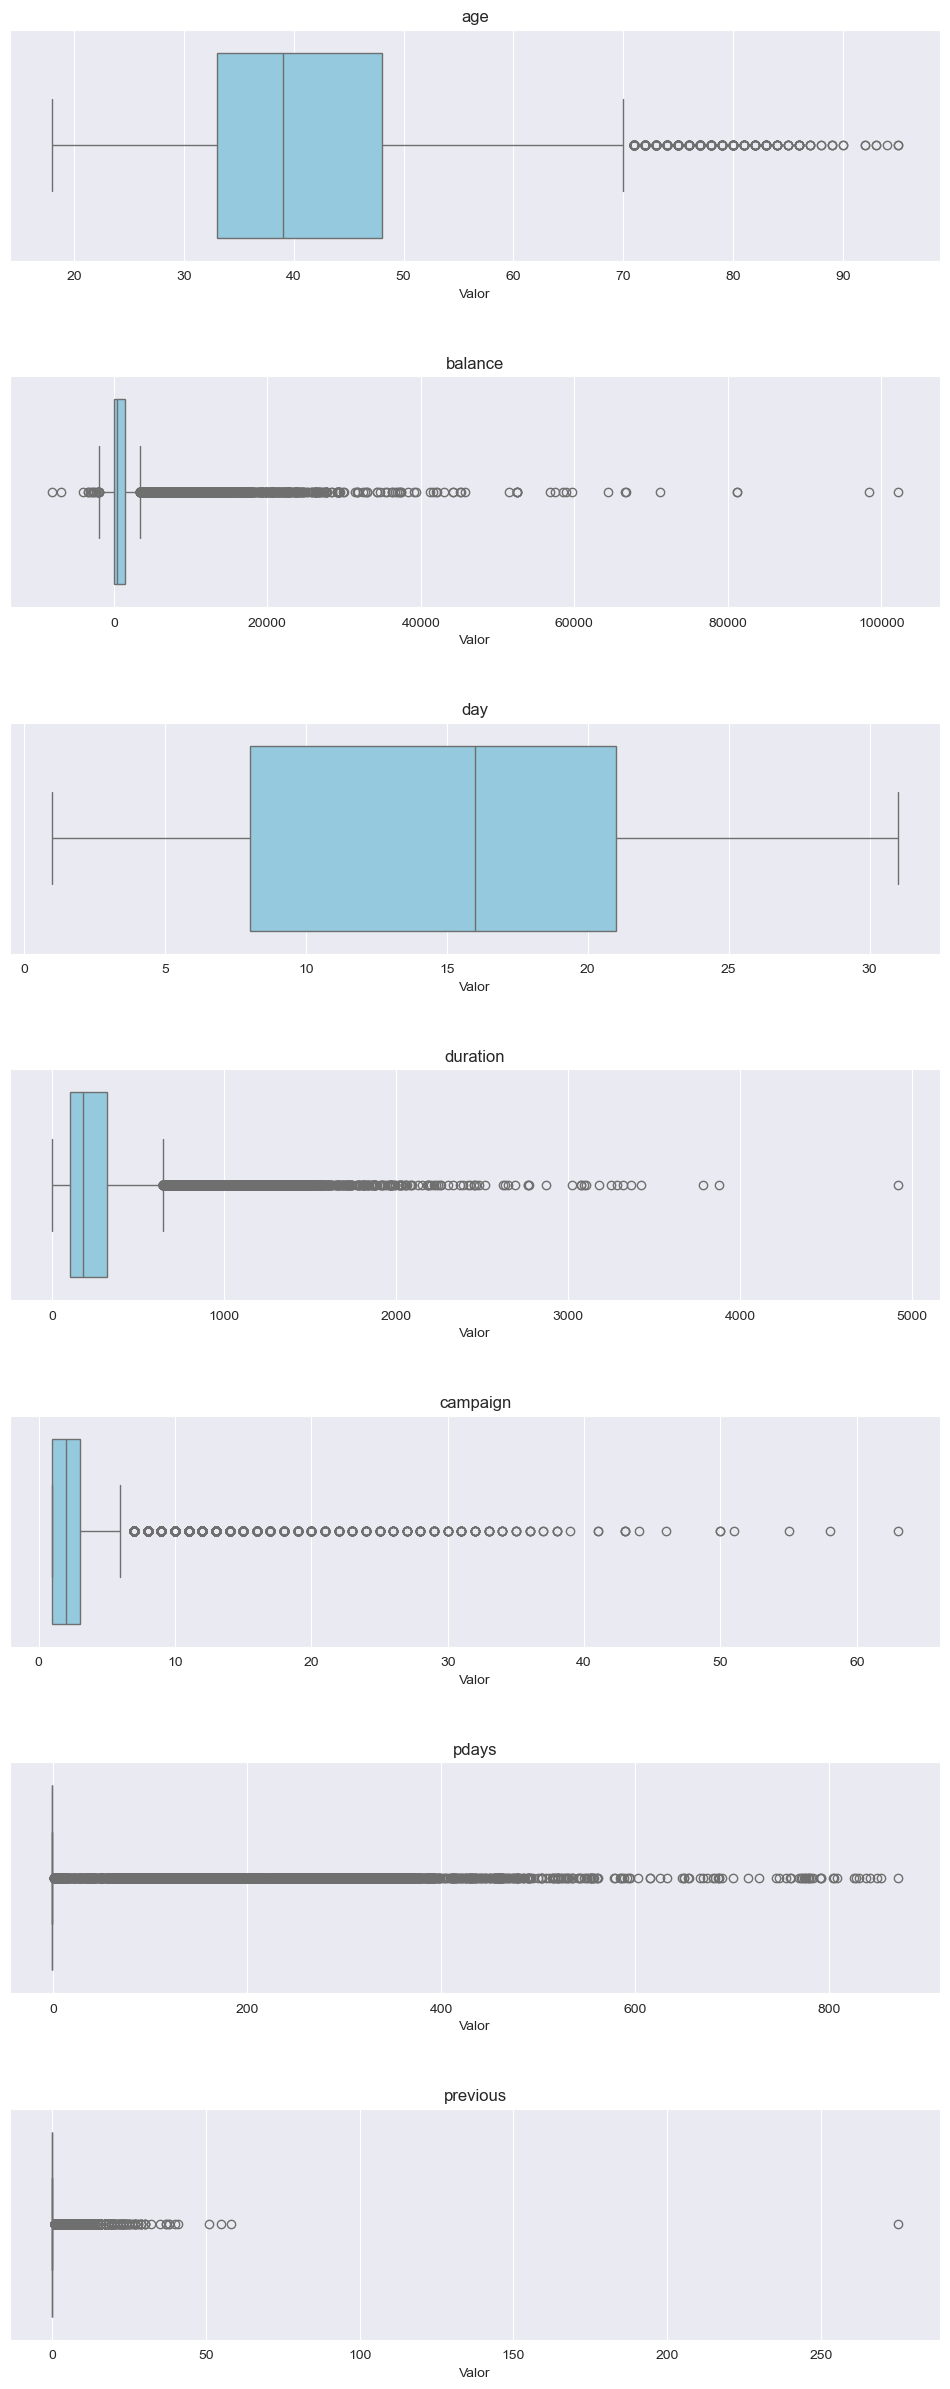

In [646]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráficos
fig, ax = plt.subplots(nrows=len(var_int), ncols=1, figsize=(12, 30))  # Aumentamos ancho para mejor visualización
fig.subplots_adjust(hspace=0.5)

# Generar boxplots horizontales
for i, caracteristica in enumerate(var_int):  
    sns.boxplot(x=dataset[caracteristica], ax=ax[i], color="skyblue")  # Ahora `x=` para hacerlos horizontales
    ax[i].set_title(caracteristica)
    ax[i].set_xlabel("Valor")  # Etiqueta en eje X

<font size="4">

Tras los resultados de los gráficos de boxplot, sacamos las siguientes conclusiones, ya que para ciertas columnas, hay valores que saltan a la vista:
- "duration": hay un valor cercano a los 5000
- "previous": hay un valor cercano a 300, mientras que el resto de outliers están alrededor de 50 como máximo

Son por estas razones por la que vamos a optar a borrar estos valores externos ya que se salen mucho del resto.
</font>

In [647]:
print(f"Tamaño antes de la eliminacion {dataset.shape[0]}")
dataset = dataset[dataset["duration"] < 4000]
print(f"Tamaño despues de la eliminacion {dataset.shape[0]}")

Tamaño antes de la eliminacion 45211
Tamaño despues de la eliminacion 45210


In [648]:
print(f"Tamaño antes de la eliminacion {dataset.shape[0]}")
dataset = dataset[dataset["previous"] < 100]
print(f"Tamaño despues de la eliminacion {dataset.shape[0]}")

Tamaño antes de la eliminacion 45210
Tamaño despues de la eliminacion 45209


<font size="4">

### 1.5 Tratamiento de los errores en la tipografía

En algunos casos, la toma de datos no es correcta y como consecuencia puede haber errores en la escritura o, incluso, puede haber situaciones donde hagamos referencia al mismo término, pero en el dataset se exprese de maneras distintas. Un ejemplo puede ser: rojo, Rojo, ROJO. En ese caso, el modelo lo entendería como tres valores distintos cuando en realidad es el mismo.

En este caso, nos vamos a fijar en las variables categóricas, ya que son las únicas que nos proporcionar valores categóricos.
</font>

Columnas categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


/var/folders/c5/j2zzk_7s55g2h_wkz452zsj80000gn/T/ipykernel_1281/835676803.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=dataset, ax=ax[i], palette="Set2")  # Agregamos un color agradable
/var/folders/c5/j2zzk_7s55g2h_wkz452zsj80000gn/T/ipykernel_1281/835676803.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=dataset, ax=ax[i], palette="Set2")  # Agregamos un color agradable
/var/folders/c5/j2zzk_7s55g2h_wkz452zsj80000gn/T/ipykernel_1281/835676803.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.coun

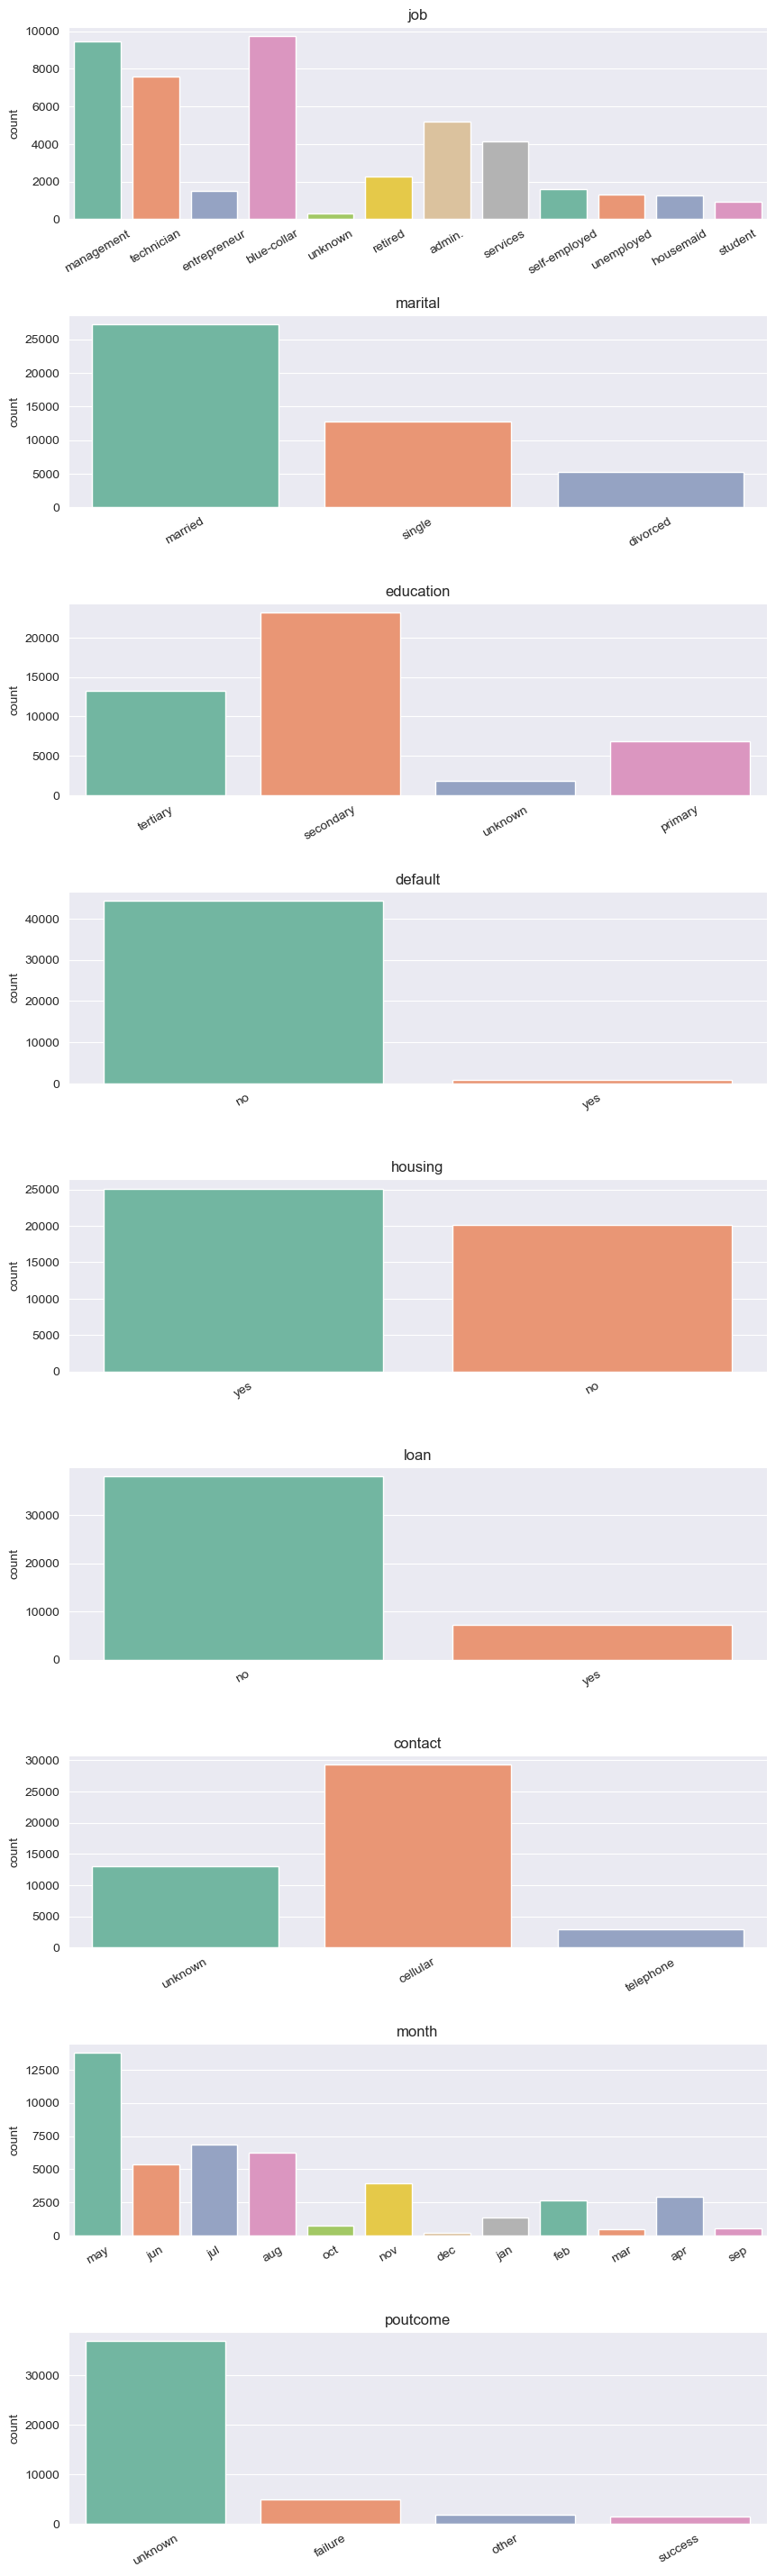

In [649]:
print(f"Columnas categoricas: {var_categorica}")

# Definir tamaño de figura dinámico
fig, ax = plt.subplots(nrows=len(var_categorica), ncols=1, figsize=(10, len(var_categorica) * 4))
fig.subplots_adjust(hspace=0.5)  # Ajuste de espacio entre gráficos

# Si hay una sola variable, `ax` no será una lista, se debe manejar esto
if len(var_categorica) == 1:
    ax = [ax]  

# Generar gráficos de barras para cada variable categórica
for i, columna in enumerate(var_categorica):
    sns.countplot(x=columna, data=dataset, ax=ax[i], palette="Set2")  # Agregamos un color agradable
    ax[i].set_title(columna, fontsize=12)
    ax[i].tick_params(axis='x', rotation=30)  # Rotar etiquetas correctamente
    ax[i].set_xlabel("")  # Quitar etiquetas de eje X para mayor limpieza

<font size="4">
Como podemos observar, no hay ningún error ortográfico en ninguna de las variables categóricas excepto, en la columna "contact" que, como podemos observar, tiene dos valores (telephone y celular) que son, a nuestro parecer, iguales, es por ello, que vamos a concatenar estas dos columnas ya que hace referencia al mismo modo de contacto. 

De esta manera estamos quitándonos una columna, para ello, vamos a irnos a la columna de contact y vamos a convertir todos los valores de celular en telephone. Después de esto, vamos a volver a mostrar los valores mediante la gráfica de barras.
</font>

In [650]:
print(f"Valores de la columna \"contact\" antes de unir columnas: {dataset['contact'].unique()}")
dataset["contact"] = dataset["contact"].astype(str)  # Convertir toda la columna a texto
dataset.loc[dataset["contact"] == "cellular", "contact"] = "telephone"
print(f"Valores de la columna \"contact\" despues de unir columnas: {dataset['contact'].unique()}")

Valores de la columna "contact" antes de unir columnas: ['unknown' 'cellular' 'telephone']
Valores de la columna "contact" despues de unir columnas: ['unknown' 'telephone']


/var/folders/c5/j2zzk_7s55g2h_wkz452zsj80000gn/T/ipykernel_1281/1340761308.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=dataset, ax=ax, palette="Set2")


Text(0.5, 0, '')

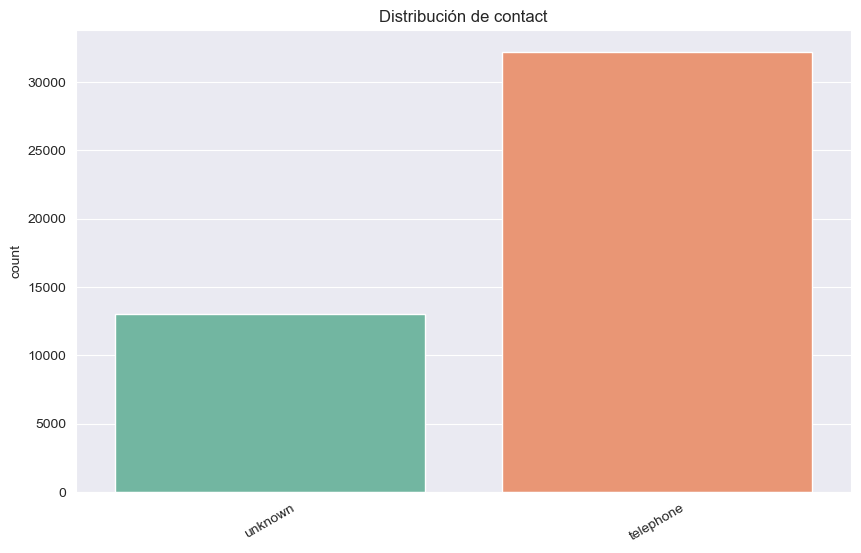

In [651]:
# Definir la columna a graficar
columna = "contact"

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))  # Tamaño ajustado para una sola columna

# Generar gráfico de barras
sns.countplot(x=columna, data=dataset, ax=ax, palette="Set2")  

# Personalizar el gráfico
ax.set_title(f"Distribución de {columna}", fontsize=12)
ax.tick_params(axis='x', rotation=30)  # Rotar etiquetas del eje X si son largas
ax.set_xlabel("")  # Ocultar etiqueta del eje X para más limpieza


<font size="4">

# 2. Análisis Exploratorio de Datos (EDA)
Una vez limpiado al completo el dataset, vamos a proceder a realizar un análisis exploratorio de los datos, con la finalidad de obtener la mayor información posible sobre el dataset. Para ello, vamos a realizar tres pasos:

1. Análisis de cada variable de manera individual.
2. Análisis univariado: relación de cada variable predictora con la variable a predecir (en este caso no se podrá aplicar).
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir (en este caso no se podrá aplicar).



### 2.1. Análisis de cada variable de manera individual.
En este apartado vamos a realizar un análisis de las variables por separado, en donde, primero analizaremos las variables categóricas y después las variables numéricas. 

Para el análisis de variables categóricas, primero vamos a recopilar la información básica utilizando la función info(), para dividir las columnas en categóricas y numéricas.
</font>

In [652]:
# recapitulamos información general de los tipos de datos que hay en cada columna.
dataset.info()
print(f"Columnas categóricas: {var_categorica}")
print(f"Columnas numéricas: {var_int}")

<class 'pandas.core.frame.DataFrame'>
Index: 45209 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45209 non-null  int64 
 1   job        45209 non-null  object
 2   marital    45209 non-null  object
 3   education  45209 non-null  object
 4   default    45209 non-null  object
 5   balance    45209 non-null  int64 
 6   housing    45209 non-null  object
 7   loan       45209 non-null  object
 8   contact    45209 non-null  object
 9   day        45209 non-null  int64 
 10  month      45209 non-null  object
 11  duration   45209 non-null  int64 
 12  campaign   45209 non-null  int64 
 13  pdays      45209 non-null  int64 
 14  previous   45209 non-null  int64 
 15  poutcome   45209 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.9+ MB
Columnas categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Columnas numéricas: ['age', 

<font size="4">
Una vez ya tenemos las variables divididas en categóricas y numéricas, vamos a proceder a centrarnos en las variables categóricas. Para ello, vamos a proceder a representar gráficamente las variables. Estas son lás siguientes conclusiones que sacamos:

- job: la mayor parte de las personas tienen como puesto de trabajo: management, blue collar y technician.
- marital: cabe a destacar que más de 25.000 personas están casadas, esto supone más del 50% de los datos
- education: podemos observar que la mayor parte de las personas registradas tienen como máximo la secundaria.
- default: podemos observar que la gran mayoria no tiene impagos en créditos.
- housing: casi encontramos un 50-50 en personas que tienen una hipoteca
- loan: se observa que la gran mayoría de las personas no tiene un préstamo en general
- contact: al hacer la unificación de las columnas de telefono y celular, podemos observar que la nueva columna "telephone" contiene casi todos las comunicaciones.
- month: se observa claramente un gran tendencia a realizar estas acciones sobre los meses de verano y mayo.
- poutcome: observamos que los resultados sobre la anterior campaña, son en su gran mayoría "desconocidos"
</font>

/var/folders/c5/j2zzk_7s55g2h_wkz452zsj80000gn/T/ipykernel_1281/1747588201.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=dataset, ax=ax[i], palette="Set2")  # Agregamos un color agradable
/var/folders/c5/j2zzk_7s55g2h_wkz452zsj80000gn/T/ipykernel_1281/1747588201.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna, data=dataset, ax=ax[i], palette="Set2")  # Agregamos un color agradable
/var/folders/c5/j2zzk_7s55g2h_wkz452zsj80000gn/T/ipykernel_1281/1747588201.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.c

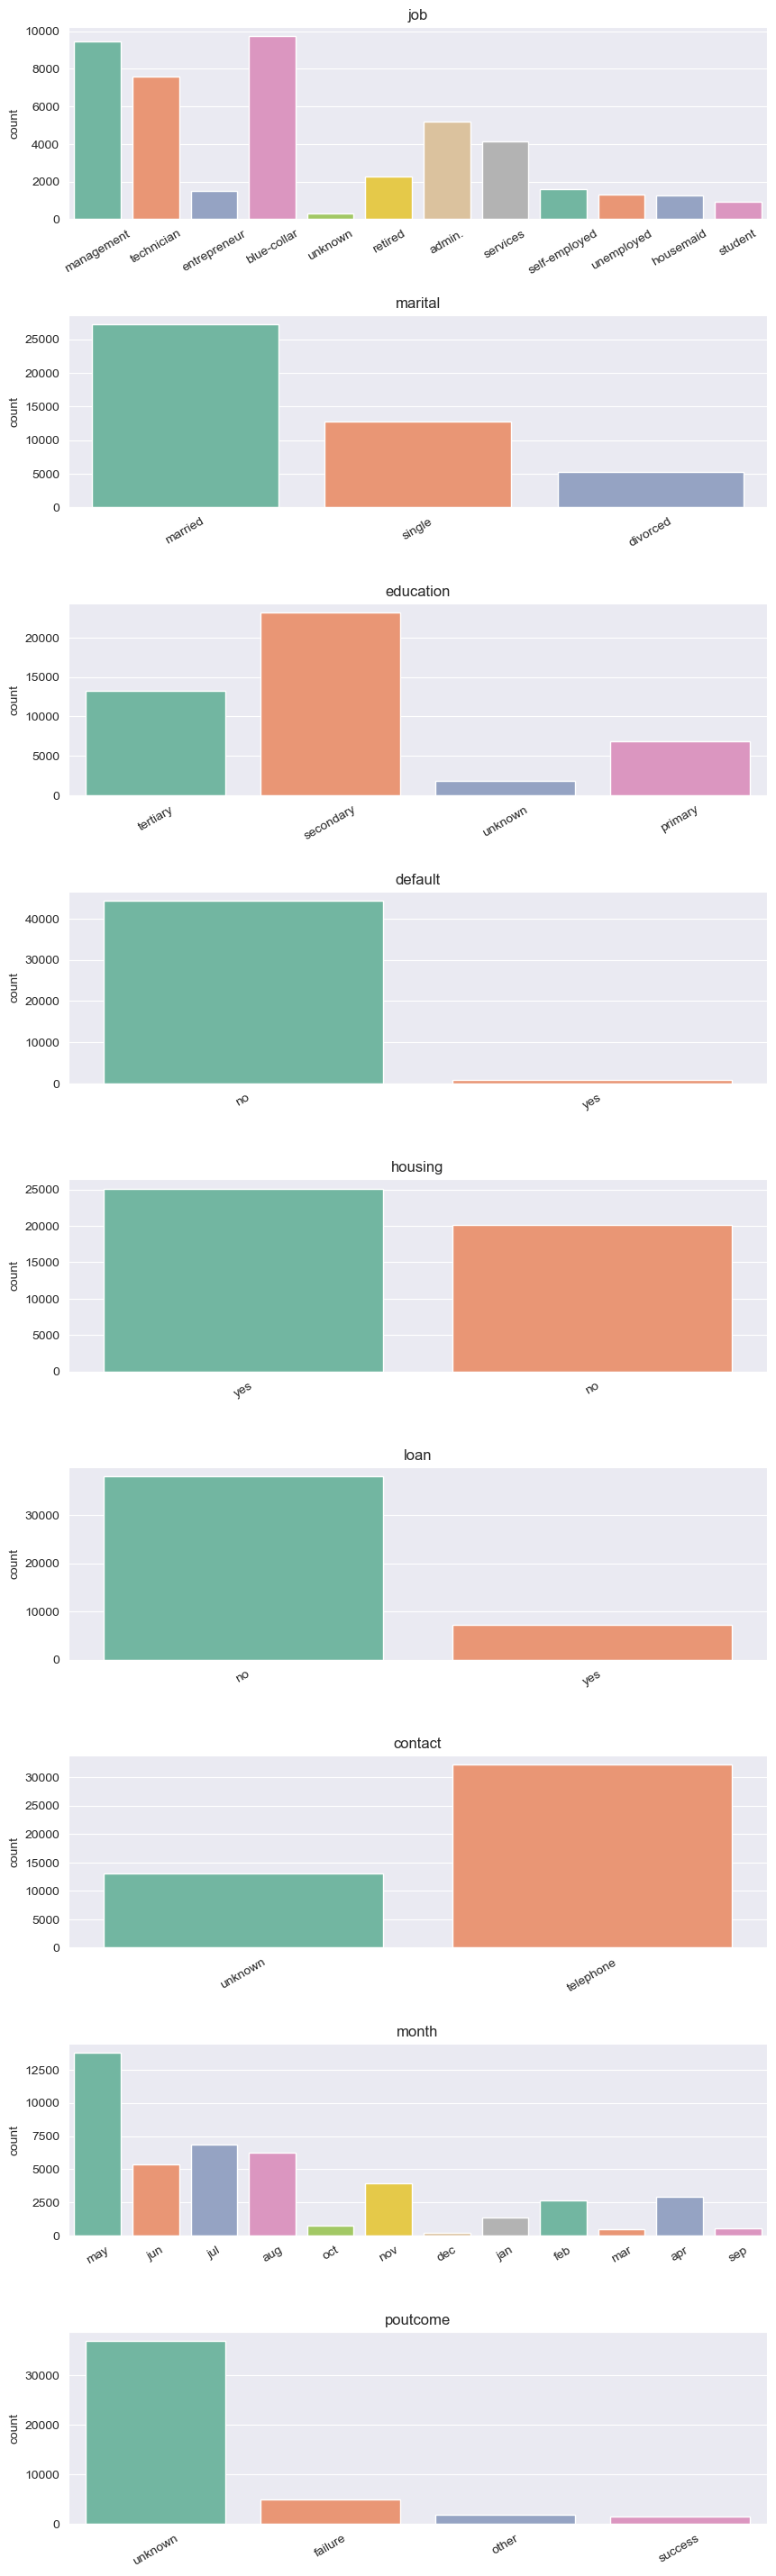

In [653]:
# Definir tamaño de figura dinámico
fig, ax = plt.subplots(nrows=len(var_categorica), ncols=1, figsize=(10, len(var_categorica) * 4))
fig.subplots_adjust(hspace=0.5)  # Ajuste de espacio entre gráficos

# Si hay una sola variable, `ax` no será una lista, se debe manejar esto
if len(var_categorica) == 1:
    ax = [ax]  

# Generar gráficos de barras para cada variable categórica
for i, columna in enumerate(var_categorica):
    sns.countplot(x=columna, data=dataset, ax=ax[i], palette="Set2")  # Agregamos un color agradable
    ax[i].set_title(columna, fontsize=12)
    ax[i].tick_params(axis='x', rotation=30)  # Rotar etiquetas correctamente
    ax[i].set_xlabel("")  # Quitar etiquetas de eje X para mayor limpieza

<font size="4">
Una vez hemos analizado, las variables categóricas, vamos a proceder a eliminar columnas, las cuales consideramos innecesarias para el modelo. De esta manera estamos reduciendo la dimensionalidad.

Para ello, hemos decidido eliminar las siguientes columnas ya que, no aportan información sobre el cliente:
- contact
- day
- month
- duration
- campaign
- pdays
- previous
</font>

In [654]:
columnas_delete = ["contact", "duration", "previous", "pdays", "campaign", "day", "month"]
columnas_total = dataset.columns.tolist()
dataset.drop(columns=columnas_delete, inplace=True)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown


In [655]:
# actualizamos variables que almacenan los tipos de columnas
for columna in columnas_total:
    if columna in columnas_delete and columna in var_categorica:
        var_categorica.remove(columna)
    elif columna in columnas_delete and columna in var_int:
        var_int.remove(columna)

In [656]:
print(f"categoricas: {var_categorica}")
print(f"numericas: {var_int}")

categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
numericas: ['age', 'balance']


<font size="4">
Antes de nada, hemos actualizado las variables que contenian los nombres de las columnas categoricas y numéricas. Ahora procedemos a analizar las variables numéricas, para ello, vamos a representar en forma de histograma los balances bancarios y la edad de las personas.
</font>

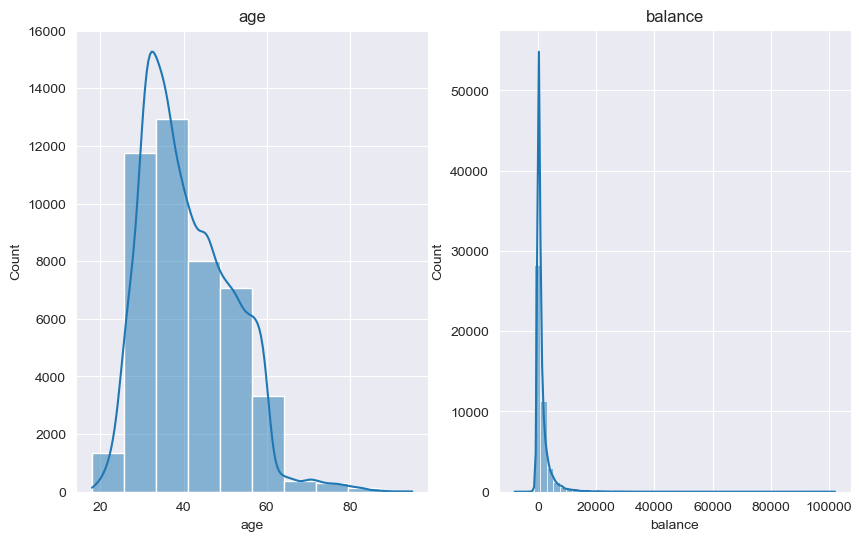

In [657]:
# representamos balance-edad
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(var_int):
    if col == "age":
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data= dataset, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)

In [658]:
# vemos como están distribuidos los datos numéricos
dataset.describe()

,age,balance
count,45209.000000,45209.000000
mean,40.935831,1362.174921
std,10.618656,3044.732112
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


<font size="4">
Podemos observar que se han representado dos gráficas, en donde se muestra tanto la edad como el balance, frente a la cantidad de personas.
En la gráfica de la edad, podemos ver que la gran mayoría se encuentra entre los 25 y 60 aproximadamente. Del mismo modo, en la gráfica del balance, podemos observar, que todo el balance se encuentra entre 0 y los 20.000€.

# 3. Diseño del Modelo
En esta fase, vamos a realizar un modelo utilizando los datos que hemos esta tratando anteriormente. Como no tenemos ninguna salida de estos datos, esto significa que estamos ante un modelo no supervisado, por lo que podremos utilizar tres posibles algoritmos: k-means, DBSCAN y agrupamiento jerárquico.

En nuestro caso, vamos a utilizar el algoritmo de k-means, el cual se basa en clasificar un punto a partir de la distancia más cercana al centroide de uno de los cluster. Antes de esto, procedemos a aplicar una técnica para reducir la dimensionalidad. Para ello, utilizaremos el método del PCA, que busca la proyección de los datos que más varianza presente. Esto se obtiene empezando por calcular la matriz de covarianza y, a partir de esta tabla, calcularemos los valores y vectores eigen, que son:
- vectores eigen: son los nuevos ejes sobre los que se van a representar los datos.
- valores eigen: son los valores de la varianza de estos datos sobre los vectores eigen
A partir de estos datos, cogeremos los n valores más grandes y esos serán las nuevas representaciones de datos sobre una dimensión inferior.

Antes de nada, para poder utilizar este método de dimensionalidad, debemos hacer un preprocesamiento de los datos, para transformar las variables categóricas en números para que el modelo comprenda y, las variables numéricas para que tengan una misma escala y asi, que las columnas de valores más altos (balance) no tengan mayor impacto que otras variables como la edad.
</font>

In [659]:
# mostramos información sobre el dataset
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown
5,35,management,married,tertiary,no,231,yes,no,unknown
6,28,management,single,tertiary,no,447,yes,yes,unknown
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown
8,58,retired,married,primary,no,121,yes,no,unknown
9,43,technician,single,secondary,no,593,yes,no,unknown


In [660]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45209 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45209 non-null  int64 
 1   job        45209 non-null  object
 2   marital    45209 non-null  object
 3   education  45209 non-null  object
 4   default    45209 non-null  object
 5   balance    45209 non-null  int64 
 6   housing    45209 non-null  object
 7   loan       45209 non-null  object
 8   poutcome   45209 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.4+ MB


In [661]:
dataset.describe()

,age,balance
count,45209.000000,45209.000000
mean,40.935831,1362.174921
std,10.618656,3044.732112
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [662]:
# preprocesamos variables numéricas y categóricas
preprocesador = ColumnTransformer([
    ("numericas", StandardScaler(), make_column_selector(dtype_include="int")),
    ("categoricas", OneHotEncoder(drop="first"), make_column_selector(dtype_include="object")),
])

In [663]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Crear el pipeline para PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocesador),  # Preprocesar los datos
    ('pca', PCA(n_components=1))  # Reducir a 2 componentes principales para visualización
])

# Ajustar y transformar los datos
dataset = pipeline.fit_transform(dataset)

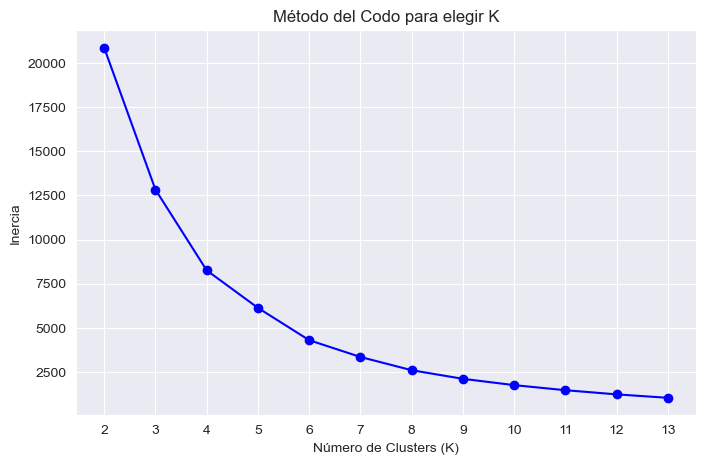

In [664]:
# definimos el modelo y vamos a aplicar la técnica del codo para ver cual es el mejor número de grupos para seleccionar

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Rango de clusters a evaluar
k_range = range(2, 14)

# Lista para almacenar los valores de inercia
inercias = []

# Bucle para calcular la inercia en cada número de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dataset)  # Asegúrate de que dataset está preprocesado
    inercias.append(kmeans.inertia_)  # Guardamos la inercia

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inercias, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir K')
plt.xticks(list(k_range))  # Corregido: Definir explícitamente k_range
plt.grid(True)
plt.show()



<font size="4">
Aplicando el método del codo para obtener cual es la mejor opción, nos vamos a quedar entre tres valores de k, que son 4, 5 y 6, ya que a partir de estos valores, los puntos se encuentran más comprimidos entre sí. Ahora para ver el mejor valor de ambos, vamos a calcular los índices de silueta y el valor de davies bouldin para ver cual trae mejores resultados.
</font>

In [665]:
# Convertir dataset a una matriz densa si es dispersa
if hasattr(dataset, "toarray"):  
    dataset = dataset.toarray()

In [666]:
# k-means para k=4
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans4.fit(dataset)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [667]:
# k-means para k=5
kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans5.fit(dataset)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [668]:
# k-means para k=5
kmeans6 = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans6.fit(dataset)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [669]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
 
# Calcular índices de evaluación
indice_silueta_4 = silhouette_score(dataset, kmeans4.labels_)
davies_bouldin_4 = davies_bouldin_score(dataset, kmeans4.labels_)

indice_silueta_5 = silhouette_score(dataset, kmeans5.labels_)
davies_bouldin_5 = davies_bouldin_score(dataset, kmeans5.labels_)

indice_silueta_6 = silhouette_score(dataset, kmeans6.labels_)
davies_bouldin_6 = davies_bouldin_score(dataset, kmeans6.labels_)

# Mostrar resultados
print("Para k = 4")
print(f"Índice de Silueta: {indice_silueta_4:.4f}")
print(f"Índice de Davies-Bouldin: {davies_bouldin_4:.4f}\n")

print("Para k = 5")
print(f"Índice de Silueta: {indice_silueta_5:.4f}")
print(f"Índice de Davies-Bouldin: {davies_bouldin_5:.4f}\n")

print("Para k = 6")
print(f"Índice de Silueta: {indice_silueta_6:.4f}")
print(f"Índice de Davies-Bouldin: {davies_bouldin_6:.4f}")

Para k = 4
Índice de Silueta: 0.5411
Índice de Davies-Bouldin: 0.5553

Para k = 5
Índice de Silueta: 0.5291
Índice de Davies-Bouldin: 0.5575

Para k = 6
Índice de Silueta: 0.5350
Índice de Davies-Bouldin: 0.5322


<font size="4">
Los índices obtenidos sugieren que el modelo de clustering tiene una calidad moderada, con una tendencia a mejorar ligeramente a medida que aumentas el número de clusters. Para k = 4, el índice de Silueta es 0.5411, lo que indica una cohesión razonablemente buena entre los puntos dentro de los clusters, mientras que el índice de Davies-Bouldin es 0.5553, lo que refleja una separación moderada entre los clusters. Para k = 5, el índice de Silueta disminuye a 0.5291, lo que sugiere una ligera disminución en la cohesión, aunque sigue siendo bastante decente, mientras que el índice de Davies-Bouldin aumenta ligeramente a 0.5575, indicando que la separación entre los clusters no ha mejorado significativamente. Para k = 6, el índice de Silueta sube ligeramente a 0.5350, lo que mejora la cohesión en comparación con k = 5, y el índice de Davies-Bouldin disminuye a 0.5322, lo que indica una ligera mejora en la separación entre los clusters. En general, el mejor resultado parece ser k = 6, ya que presenta una combinación de un índice de Silueta relativamente alto y un índice de Davies-Bouldin bajo, lo que sugiere una buena cohesión y separación de los clusters.
</font>